In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('dataset.csv')  # Ajusta la ruta

print("🔍 Primer vistazo al dataset:")
print(df.head())
print(f"\n📊 Dimensiones: {df.shape}")
print(f"\n🎯 Distribución del target:")
print(df['target_variable'].value_counts())

# Información general
print("\n📋 Info del dataset:")
print(df.info())
print("\n📈 Estadísticas descriptivas:")
print(df.describe())

🔍 Primer vistazo al dataset:
   id  product_A_sold_in_the_past  product_B_sold_in_the_past  \
0   1                    -0.25992                    -0.34794   
1   2                    -0.25992                    -0.28599   
2   3                    -0.25992                    -0.18998   
3   4                     0.65945                     3.35306   
4   5                    -0.25992                    -0.24623   

   product_A_recommended  product_A  product_C  product_D  cust_hitrate  \
0                -0.1097    -0.0891   -0.02372   -0.04247       0.12643   
1                -0.1097    -0.0891   -0.02372   -0.04247       0.42465   
2                -0.1097    -0.0891   -0.02372   -0.04247       0.72559   
3                -0.1097    -0.0891   -0.02372   -0.04247       1.55091   
4                -0.1097    -0.0891   -0.02372   -0.04247      -0.50193   

   cust_interactions  cust_contracts  opp_month  opp_old  competitor_Z  \
0            0.30731        -0.34997   -1.41464 -0.2818

📚 Datos de entrenamiento: (28719, 15)
🧪 Datos de test: (7180, 15)

📊 MÉTRICAS DEL MODELO:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3802
           1       0.70      0.68      0.69      3378

    accuracy                           0.71      7180
   macro avg       0.71      0.71      0.71      7180
weighted avg       0.71      0.71      0.71      7180



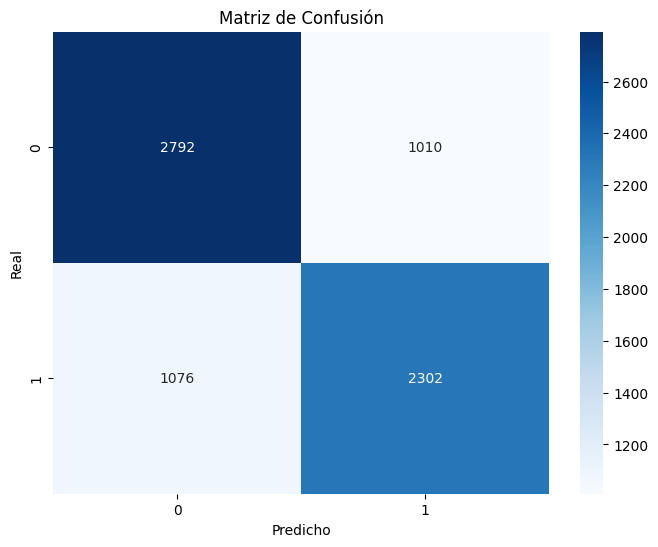


🎯 IMPORTANCIA DE LAS VARIABLES:
                       feature  importance
6                 cust_hitrate    0.417377
7            cust_interactions    0.121695
10                     opp_old    0.117835
1   product_B_sold_in_the_past    0.068882
8               cust_contracts    0.055425
9                    opp_month    0.054440
0   product_A_sold_in_the_past    0.053679
2        product_A_recommended    0.032236
11                competitor_Z    0.022793
13                competitor_Y    0.019159
14              cust_in_iberia    0.018551
3                    product_A    0.011807
5                    product_D    0.002945
12                competitor_X    0.001599
4                    product_C    0.001576


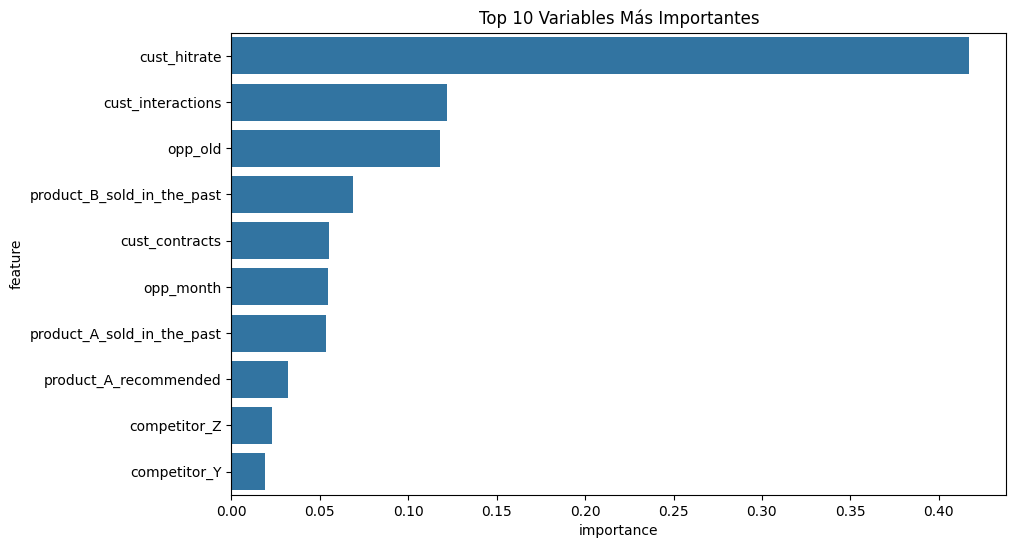

In [5]:
def entrenar_modelo_clasificacion(df):
    # Separar features y target
    X = df.drop('target_variable', axis=1)
    y = df['target_variable']
    
    # Si quieres excluir el ID también
    if 'id' in X.columns:
        X = X.drop('id', axis=1)
    
    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"📚 Datos de entrenamiento: {X_train.shape}")
    print(f"🧪 Datos de test: {X_test.shape}")
    
    # Entrenar modelo
    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10
    )
    
    model.fit(X_train, y_train)
    
    # Predecir y evaluar
    y_pred = model.predict(X_test)
    
    print("\n📊 MÉTRICAS DEL MODELO:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()
    
    # Importancia de features
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n🎯 IMPORTANCIA DE LAS VARIABLES:")
    print(feature_importance)
    
    # Visualizar importancia
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Variables Más Importantes')
    plt.show()
    
    return model, X_train, X_test, y_train, y_test

# Ejecutar el modelo
modelo, X_train, X_test, y_train, y_test = entrenar_modelo_clasificacion(df)

In [7]:
def predecir_nuevos_clientes(model, nuevos_datos):
    """
    nuevos_datos: DataFrame con las mismas columnas que el dataset original
    """
    # Excluir target_variable si existe
    if 'target_variable' in nuevos_datos.columns:
        nuevos_datos = nuevos_datos.drop('target_variable', axis=1)
    
    if 'id' in nuevos_datos.columns:
        nuevos_datos = nuevos_datos.drop('id', axis=1)
    
    predicciones = model.predict(nuevos_datos)
    probabilidades = model.predict_proba(nuevos_datos)
    
    resultados = pd.DataFrame({
        'prediccion': predicciones,
        'probabilidad_clase_1': probabilidades[:, 1],
        'probabilidad_clase_0': probabilidades[:, 0]
    })
    
    return resultados

# Ejemplo de uso con nuevos datos
nuevos_clientes = pd.DataFrame({
    'product_A_sold_in_the_past': [-0.25, -0.30, -0.20],
    'product_B_sold_in_the_past': [-0.34, -0.28, -0.19],
    'product_A_recommended': [-0.10, -0.11, -0.09],
    # ... completar con todas las columnas
})

# predicciones = predecir_nuevos_clientes(modelo, nuevos_clientes)
# print(predicciones)

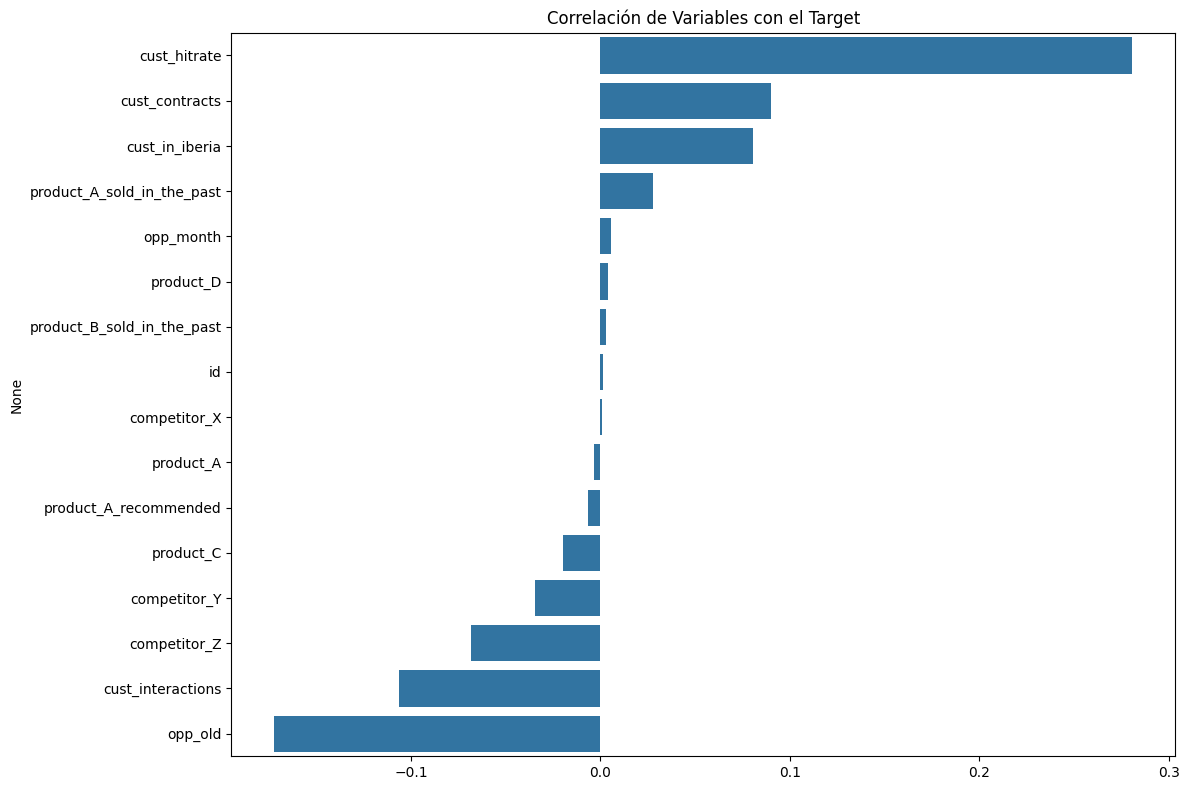

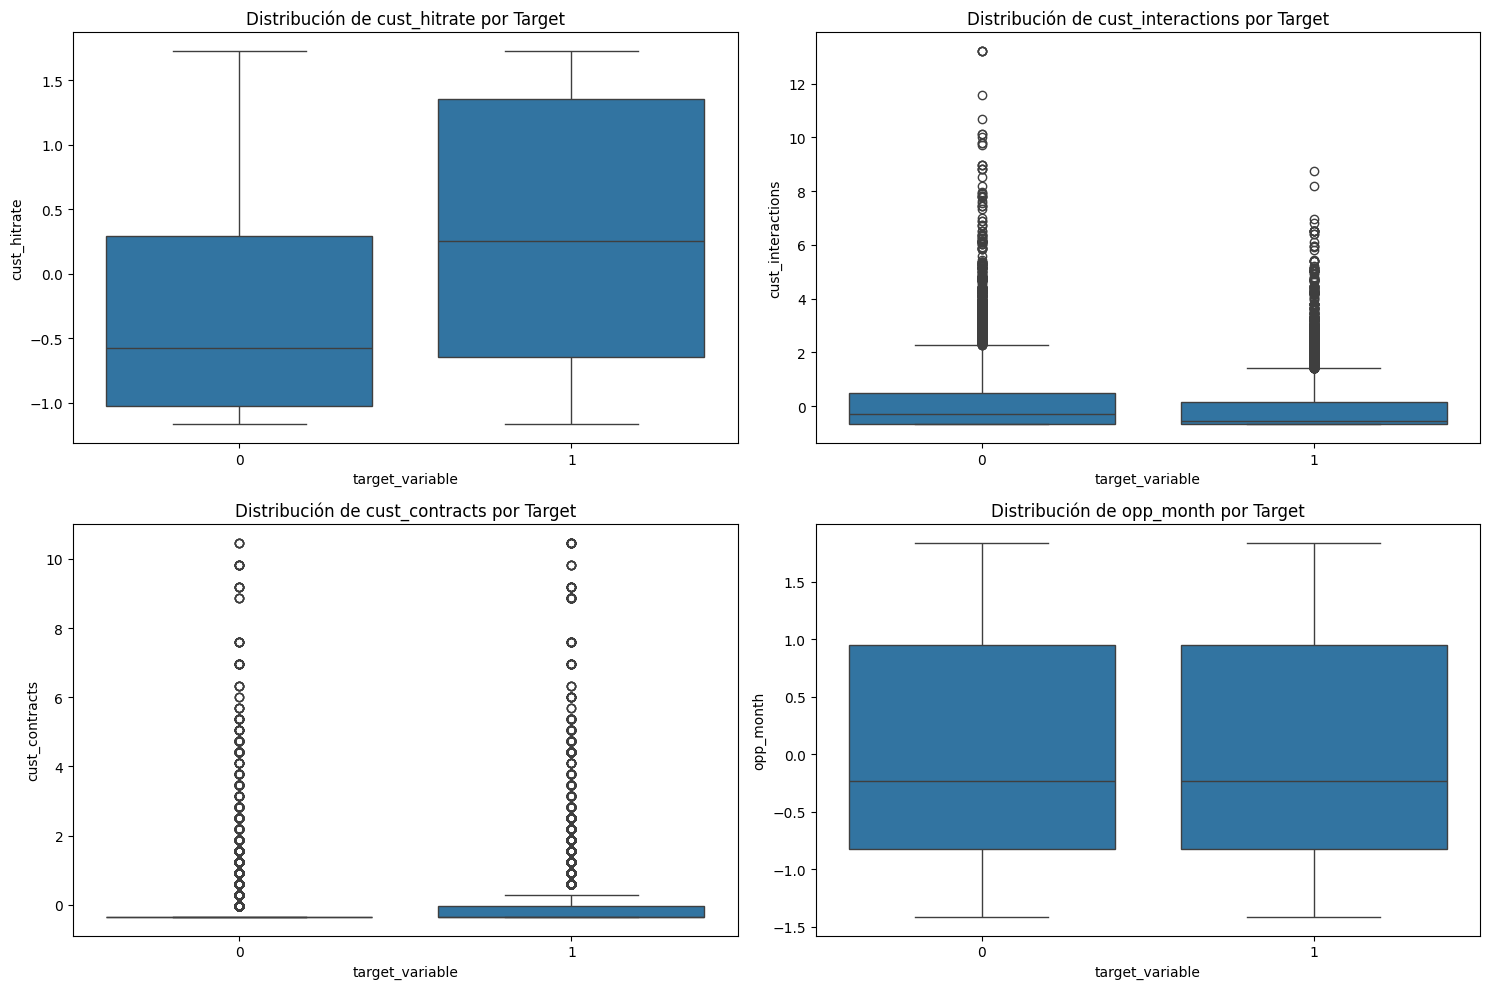

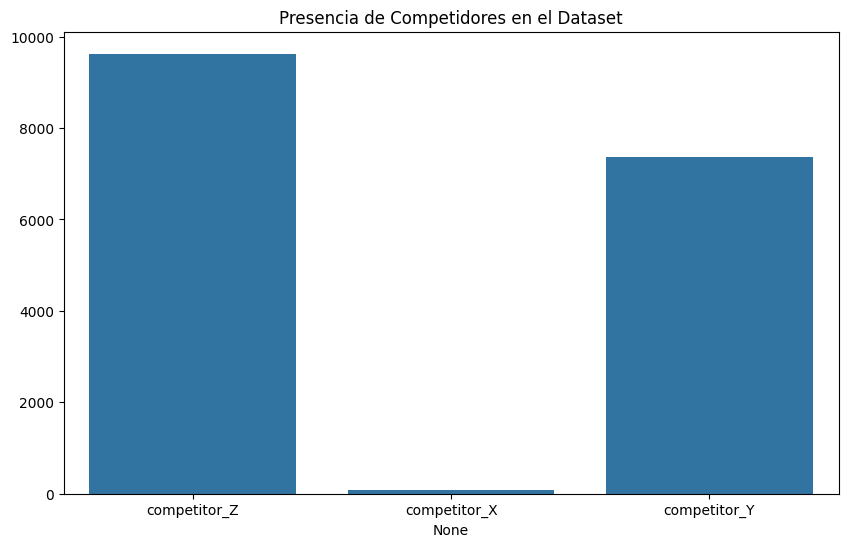

In [8]:
def analisis_completo_dataset(df):
    # 1. Correlación con el target
    plt.figure(figsize=(12, 8))
    correlation_with_target = df.corr()['target_variable'].sort_values(ascending=False)
    correlation_with_target.drop('target_variable', inplace=True)
    
    sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
    plt.title('Correlación de Variables con el Target')
    plt.tight_layout()
    plt.show()
    
    # 2. Distribución de variables importantes
    variables_importantes = ['cust_hitrate', 'cust_interactions', 'cust_contracts', 'opp_month']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, var in enumerate(variables_importantes):
        if var in df.columns:
            sns.boxplot(data=df, x='target_variable', y=var, ax=axes[i])
            axes[i].set_title(f'Distribución de {var} por Target')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Análisis de competidores
    competidores = ['competitor_Z', 'competitor_X', 'competitor_Y']
    if all(col in df.columns for col in competidores):
        plt.figure(figsize=(10, 6))
        comp_sum = df[competidores].sum()
        sns.barplot(x=comp_sum.index, y=comp_sum.values)
        plt.title('Presencia de Competidores en el Dataset')
        plt.show()

# Ejecutar análisis completo
analisis_completo_dataset(df)